In [253]:
#Let's import the required libraries first

In [254]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from warnings import filterwarnings 
filterwarnings('ignore')

## Problem statement

A retail company 'ABC privated limited' wants to understand the customer purchase behaviour (specially ,purchase amount) against various products of different categories .They have shared purchase summary of various customers for selected high volume products from last month.The data set also contains customer demographics (age,gender,marital status,city type,stay in current city )product details(product id,product category) and total purchase  amount from last month.

Now they want to build a model to predict the purchase amount of customer against the products which will help them to create perosnalised offer for customers against different products.

In [255]:
#importing the dataframe
df=pd.read_csv('ABC_Retail_shop_train.csv')


In [256]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [257]:
df.shape

(550068, 12)

In [258]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [259]:
df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [260]:
#we are here droping the column that is of no use 
#userid,product_id

df.drop(['User_ID','Product_ID'],axis=1,inplace=True)

In [261]:
df.columns

Index(['Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [262]:
df.shape

(550068, 10)

In [263]:
df.describe()

,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [264]:

# to check the data types 

df.dtypes
#There are many columns that has been misclassified 
#First we have to correct them

Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                        int64
dtype: object

In [265]:
#marital status should be object type as it has only 2 unique values
df.Marital_Status=df.Marital_Status.astype('object')

## Missing value Treatment

In [266]:
#Checking for the missing values in the data
df.isnull().sum()

Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [267]:
#as we can see Product_Category_2,Product_Category_3 has missing values
# Replacing missing values

df.Product_Category_2.unique()

array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [268]:
#Finding each categories percentage

(df.Product_Category_2.value_counts()/len(df))*100

8.0     11.650923
14.0    10.018398
2.0      8.947439
16.0     7.863573
15.0     6.881876
5.0      4.769410
4.0      4.667968
6.0      2.993448
11.0     2.569500
17.0     2.421519
13.0     1.914491
9.0      1.034963
12.0     1.004967
10.0     0.553204
3.0      0.524299
18.0     0.503574
7.0      0.113804
Name: Product_Category_2, dtype: float64

In [269]:
# As  it is a categorical value we filled the data with mode

df['Product_Category_2']=df['Product_Category_2'].fillna(df['Product_Category_2'].mode()[0])

In [270]:
#Check for the missing value
df['Product_Category_2'].isnull().sum()

0

In [271]:
#Doing the same with product category 3

df['Product_Category_3']=df['Product_Category_3'].fillna(df['Product_Category_3'].mode()[0])

In [272]:
df['Product_Category_3'].isnull().sum()

0

In [273]:
df.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,F,0-17,10,A,2,0,3,8.0,16.0,8370
1,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,F,0-17,10,A,2,0,12,8.0,16.0,1422
3,F,0-17,10,A,2,0,12,14.0,16.0,1057
4,M,55+,16,C,4+,0,8,8.0,16.0,7969


* ### Lets differentiate the number columns from the dataset

In [274]:
df.select_dtypes(include=np.number)

,Occupation,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,10,3,8.0,16.0,8370
1,10,1,6.0,14.0,15200
2,10,12,8.0,16.0,1422
3,10,12,14.0,16.0,1057
4,16,8,8.0,16.0,7969
...,...,...,...,...,...
550063,13,20,8.0,16.0,368
550064,1,20,8.0,16.0,371
550065,15,20,8.0,16.0,137
550066,1,20,8.0,16.0,365


In [275]:
num_cols=df.select_dtypes(include=np.number)
print(num_cols.columns)
num_cols

Index(['Occupation', 'Product_Category_1', 'Product_Category_2',
       'Product_Category_3', 'Purchase'],
      dtype='object')


,Occupation,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,10,3,8.0,16.0,8370
1,10,1,6.0,14.0,15200
2,10,12,8.0,16.0,1422
3,10,12,14.0,16.0,1057
4,16,8,8.0,16.0,7969
...,...,...,...,...,...
550063,13,20,8.0,16.0,368
550064,1,20,8.0,16.0,371
550065,15,20,8.0,16.0,137
550066,1,20,8.0,16.0,365


## Univariate analysis

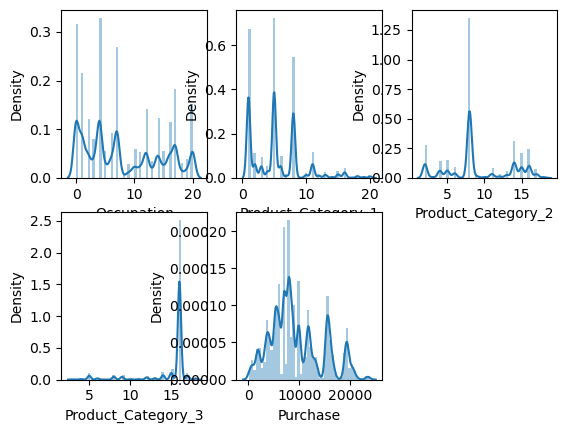

<Figure size 640x480 with 0 Axes>

In [276]:
#ploting the plots for number columns
nrows=2
ncols=3
t=1
for i in num_cols:
    plt.subplot(nrows,ncols,t)
    sns.distplot(df.loc[:,i],)
    t=t+1
plt.show()
plt.tight_layout()


* ### Lets differentiate the category columns from the dataset

In [251]:
cat_cols=[['Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3']]

In [ ]:

t=1

for i in cat_cols:
    plt.subplot(3,2,t)
    df.loc[:,i].value_counts().plot(kind='bar')
    t=t+1
    plt.title(i)
plt.tight_layout()
plt.show()

In [ ]:
#Inferences
*Gender-
*Age-
*Occupation
*City_Category
*Stay_In_Current_City_Years
*Marital_Status

## Bivariate analysis

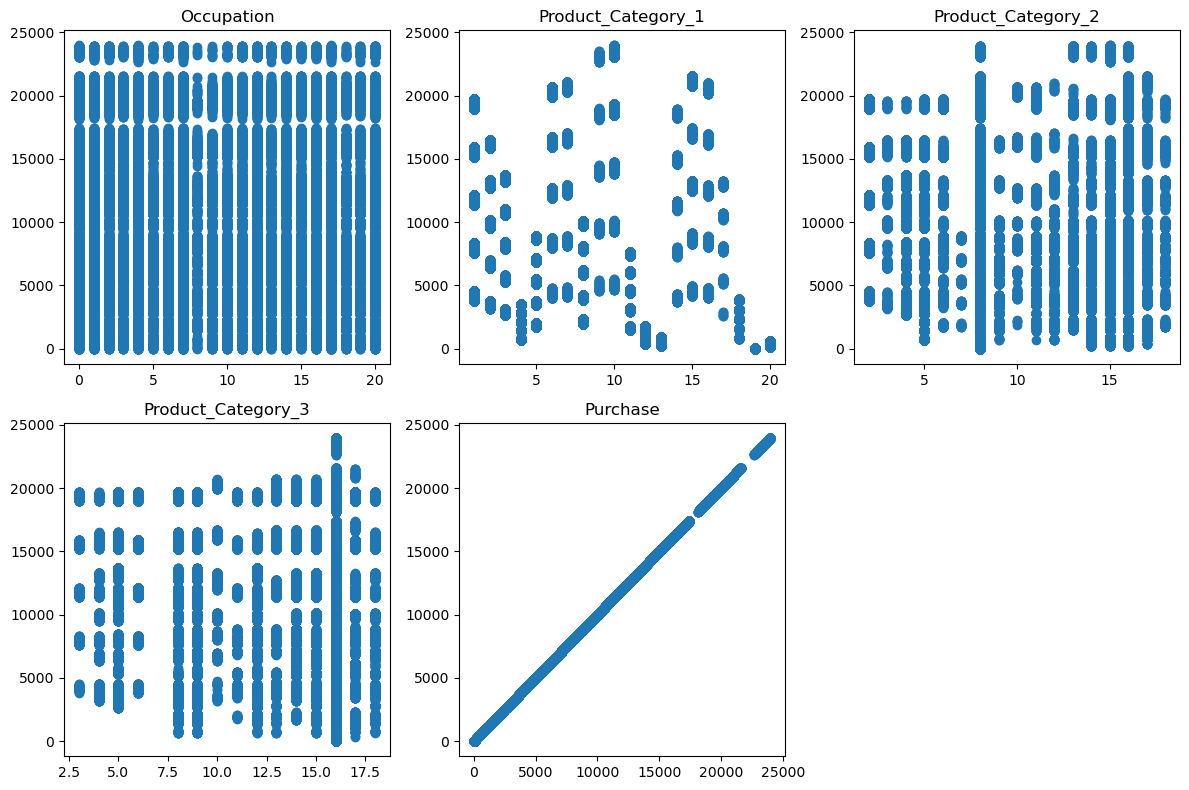

In [218]:
# Num vs Num

nrows = 2
ncols = 3
t = 1

plt.figure(figsize = (12, 8))
for i in num_cols:
    plt.subplot(nrows, ncols, t)
    plt.scatter(df.loc[:, i], 
                    df.Purchase)
    plt.title(i)
    t+=1
    
plt.tight_layout()
plt.show()

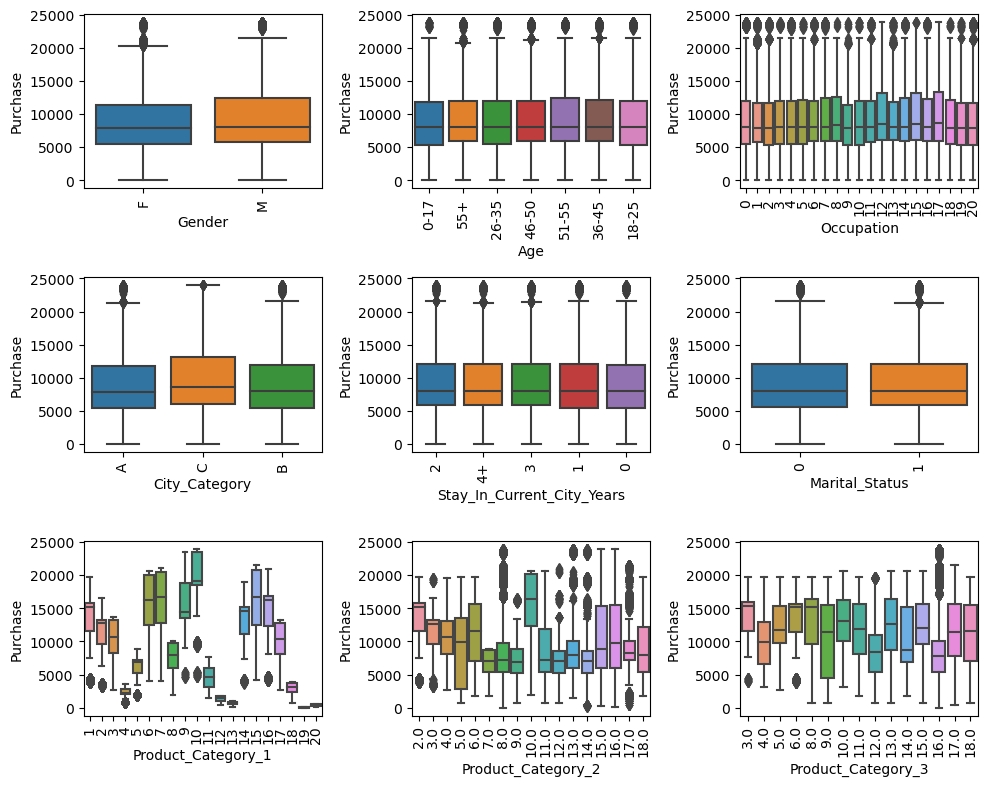

In [219]:
# Cat vs Num
c=['Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3']
nrows = 4
ncols = 3
rep = 1

plt.figure(figsize = (10, 10))
for i in c:
    plt.subplot(nrows, ncols, rep)
    sns.boxplot(data = df, 
                x = i, y = 'Purchase')
    plt.xticks(rotation = 90)
    rep+=1
    
plt.tight_layout()
plt.show()

<Axes: xlabel='Purchase'>

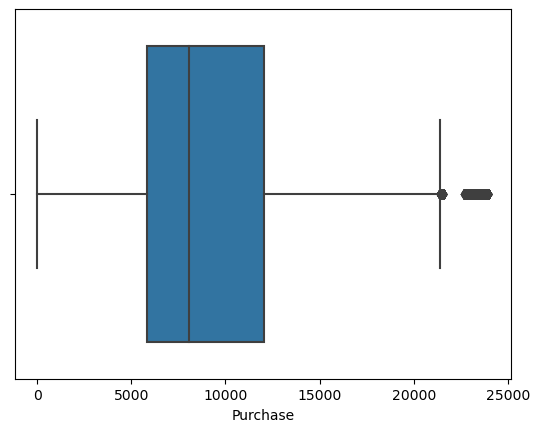

In [220]:
#Lets analyize the target
sns.boxplot(data=df,x='Purchase')

In [221]:
df.columns

Index(['Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

## Dealing with the categorical column ``Gender``

In [222]:
df.Gender.value_counts(normalize=True)

M    0.753105
F    0.246895
Name: Gender, dtype: float64

### In our dataset consist of 75% male and 25% are female

In [223]:
#here we are using the map function to map the data in such a way that 
#if there is female in the data map it with 0
#if male map ot with 1
df['Gender']=df['Gender'].map({'F':0,'M':1})

In [224]:
#we can do it in another way that is
#we use get dummies method and drop first
df['Gender']=pd.get_dummies(df['Gender'],drop_first=1)

In [225]:
df.head(2)

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0,0-17,10,A,2,0,3,8.0,16.0,8370
1,0,0-17,10,A,2,0,1,6.0,14.0,15200


 ## dealing with the column `Age`

In [226]:
#As it is a categorical colum we first find out how many categories are there and what are they

df.Age.unique()  #there are 7 categories


array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [227]:
# method-1# ordinal encoding

df['Age']=df['Age'].map({'0-17':1,'18-25':2,'26-35':3,\
                '36-45':4, '46-50':5,'51-55':6,'55+' :7      })

In [228]:
df['Age'].value_counts().sort_values(ascending=False)

3    219587
4    110013
2     99660
5     45701
6     38501
7     21504
1     15102
Name: Age, dtype: int64

### Count of every age group 
* 1-Age group- '0-17' = 15102
* 2-Age group- '18-25'= 99660
* 3-Age group- '26-35'= 219587
* 4-Age group- '36-45'= 110013 
* 5-Age group- '46-50'= 45701
* 6-Age group- '51-55'= 38501
* 7-Age group- '55+'  = 21504
 

In [229]:
df.columns

Index(['Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

### dealing with the column City_Category


In [230]:
df_City

,B,C
0,0,0
1,0,0
2,0,0
3,0,0
4,0,1
...,...,...
550063,1,0
550064,0,1
550065,1,0
550066,0,1


In [231]:
df_City=pd.get_dummies(df['City_Category'],drop_first=True)

In [232]:
df.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0,1,10,A,2,0,3,8.0,16.0,8370
1,0,1,10,A,2,0,1,6.0,14.0,15200
2,0,1,10,A,2,0,12,8.0,16.0,1422
3,0,1,10,A,2,0,12,14.0,16.0,1057
4,1,7,16,C,4+,0,8,8.0,16.0,7969


In [233]:
df=pd.concat([df,df_City],axis=1)

In [234]:
#after ordinal encoding the city category column should be dropped to avoid multicoliearity

df.drop(['City_Category'],axis=1,inplace=True)

In [235]:
df.head()

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,0,1,10,2,0,3,8.0,16.0,8370,0,0
1,0,1,10,2,0,1,6.0,14.0,15200,0,0
2,0,1,10,2,0,12,8.0,16.0,1422,0,0
3,0,1,10,2,0,12,14.0,16.0,1057,0,0
4,1,7,16,4+,0,8,8.0,16.0,7969,0,1


### Dealing with Stay_In_Current_City_Years

In [236]:
#In 'Stay_In_Current_City_Years' we got 4+ that is not a number we have to remove that +

df['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [237]:
df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].str.replace('+',' ')

In [238]:
df.head(10)

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,0,1,10,2,0,3,8.0,16.0,8370,0,0
1,0,1,10,2,0,1,6.0,14.0,15200,0,0
2,0,1,10,2,0,12,8.0,16.0,1422,0,0
3,0,1,10,2,0,12,14.0,16.0,1057,0,0
4,1,7,16,4,0,8,8.0,16.0,7969,0,1
5,1,3,15,3,0,1,2.0,16.0,15227,0,0
6,1,5,7,2,1,1,8.0,17.0,19215,1,0
7,1,5,7,2,1,1,15.0,16.0,15854,1,0
8,1,5,7,2,1,1,16.0,16.0,15686,1,0
9,1,3,20,1,1,8,8.0,16.0,7871,0,0


In [239]:
#Convert object into integers

df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].astype('int')

In [240]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Gender                      550068 non-null  uint8  
 1   Age                         550068 non-null  int64  
 2   Occupation                  550068 non-null  int64  
 3   Stay_In_Current_City_Years  550068 non-null  int32  
 4   Marital_Status              550068 non-null  object 
 5   Product_Category_1          550068 non-null  int64  
 6   Product_Category_2          550068 non-null  float64
 7   Product_Category_3          550068 non-null  float64
 8   Purchase                    550068 non-null  int64  
 9   B                           550068 non-null  uint8  
 10  C                           550068 non-null  uint8  
dtypes: float64(2), int32(1), int64(4), object(1), uint8(3)
memory usage: 33.0+ MB


In [241]:
df['B']=df['B'].astype(int)

In [242]:
df['C']=df['C'].astype(int)

In [243]:
df.B.info

<bound method Series.info of 0         0
1         0
2         0
3         0
4         0
         ..
550063    1
550064    0
550065    1
550066    0
550067    1
Name: B, Length: 550068, dtype: int32>

In [244]:
df

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,0,1,10,2,0,3,8.0,16.0,8370,0,0
1,0,1,10,2,0,1,6.0,14.0,15200,0,0
2,0,1,10,2,0,12,8.0,16.0,1422,0,0
3,0,1,10,2,0,12,14.0,16.0,1057,0,0
4,1,7,16,4,0,8,8.0,16.0,7969,0,1
...,...,...,...,...,...,...,...,...,...,...,...
550063,1,6,13,1,1,20,8.0,16.0,368,1,0
550064,0,3,1,3,0,20,8.0,16.0,371,0,1
550065,0,3,15,4,1,20,8.0,16.0,137,1,0
550066,0,7,1,2,0,20,8.0,16.0,365,0,1
